<a href="https://colab.research.google.com/github/erodola/NumMeth-s2-2022/blob/main/esercizi/ex3/ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Benvenuti alla terza esercitazione di Metodi Numerici!

Oggi vedremo il concetto di regolarizzazione (*sparsità* e *regolarità* (smoothness)) in modo pratico verificando l'effetto su segniali definiti su diversi domini. Importiamo i requirements, definiamo alcune funzioni di supporto e scarichiamo i dati necessari:

In [3]:
import librosa
import numpy as np
import IPython
import matplotlib.pyplot as plt
import scipy.sparse as sparse
import scipy

In [4]:
def plot(x, y, title=None):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot()
    ax.set_xlabel('t')
    ax.set_title(title)
    ax.plot(x, y, '-')
    plt.show()

In [5]:
!wget https://github.com/erodola/NumMeth-s2-2022/raw/main/esercizi/ex3/drums.wav

--2022-03-20 11:46:26--  https://github.com/erodola/NumMeth-s2-2022/raw/main/esercizi/ex3/drums.wav
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/erodola/NumMeth-s2-2022/main/esercizi/ex3/drums.wav [following]
--2022-03-20 11:46:26--  https://raw.githubusercontent.com/erodola/NumMeth-s2-2022/main/esercizi/ex3/drums.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21305422 (20M) [application/octet-stream]
Saving to: ‘drums.wav’

drums.wav           100%[===================>]  20.32M  --.-KB/s    in 0.07s   

2022-03-20 11:46:27 (287 MB/s) - ‘drums.wav’ saved [21305422/21305422]



## Regolarizzazione di Tikhonov

Riprendiamo il fitting di polinomi usando il metodo dei minimi quadrati. Supponiamo di trovarci nel caso in cui il numero di punti a disposizione è inferiore a quello del grado del polinomio. Per esempio se abbiamo $n=4$, il sistema è sotto-determinato nel caso in cui il numero di coppie di punti a nostra disposizione è inferiore a 5. 

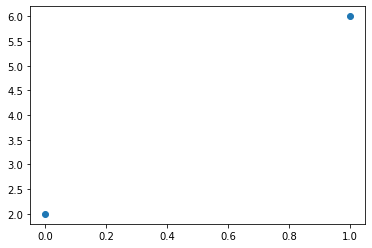

In [124]:
n = 4

x2 = np.array([0, 1])[:, np.newaxis]
y2 = np.array([2., 6.])[:, np.newaxis]

plt.scatter(x2, y2)

Proviamo a trovare una soluzione $\theta$ usando il regolarizzatore di Tikhonov
$ \mathbf{\theta} = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{I})^{-1} \mathbf{X}^T \mathbf{y}$. Per questo esempio scegliamo $\alpha = 1$.

In [125]:
X2 = np.concatenate((x2**4, x2**3, x2**2, x2**1, x2**0),1)
print(f"X2 = {X2}")

theta2 = np.linalg.inv(X2.T @ X2 + 1. * np.eye(5)) @ X2.T @ y2
print(f"theta = {theta2}")

X2 = [[0 0 0 0 1]
 [1 1 1 1 1]]
theta = [[0.90909091]
 [0.90909091]
 [0.90909091]
 [0.90909091]
 [1.45454545]]


In [163]:
x2_new = np.linspace(-2, 2, 20)[:, np.newaxis]
X2_new = np.concatenate((x2_new**4, x2_new**3, x2_new**2, x2_new**1, x2_new**0),1)
y2_new = X2_new@theta2  
print(f"y2_new = {y2_new}")

y2_new = [[10.54545455]
 [ 6.85149885]
 [ 4.35737769]
 [ 2.77111273]
 [ 1.84358483]
 [ 1.36853406]
 [ 1.18255971]
 [ 1.16512025]
 [ 1.23853338]
 [ 1.367976  ]
 [ 1.5614842 ]
 [ 1.86995328]
 [ 2.38713777]
 [ 3.24965139]
 [ 4.63696704]
 [ 6.77141687]
 [ 9.91819221]
 [14.3853436 ]
 [20.52378079]
 [28.72727273]]


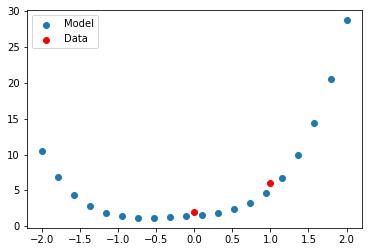

In [161]:
plt.scatter(x2_new, y2_new)
plt.scatter(x2, y2, color='r')
plt.legend(['Model', 'Data'])

**Esercizio 1**

 1. Rifare l'esempio aggiungendo un data point. Confrontare la soluzione
 per lo stesso valore di $\alpha = 1$
 2. Provare a variare il valore di $\alpha$ usando i valori [0.1, 0.5, 10., 100.]. Plottare le diverse curve fittate insieme alle componenti di $\theta$. Come cambiano le componenti di $\theta$ all'aumentare di $\alpha$?
 3. Cosa succede quando $\alpha \to 0$? Come si può interpretare in modo matematico questo fenomeno?

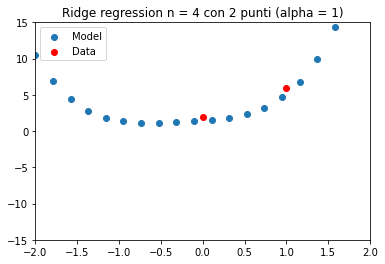

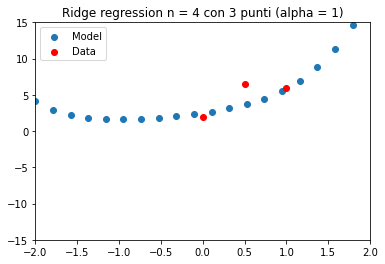

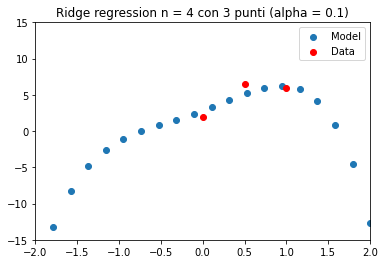

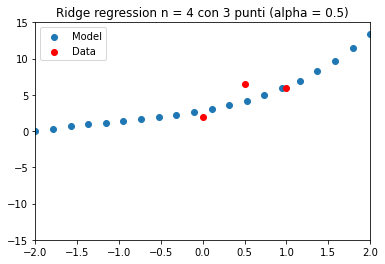

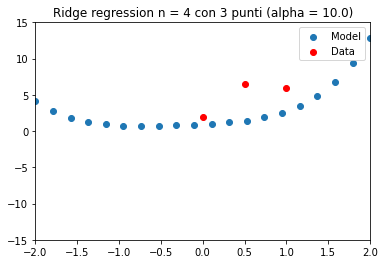

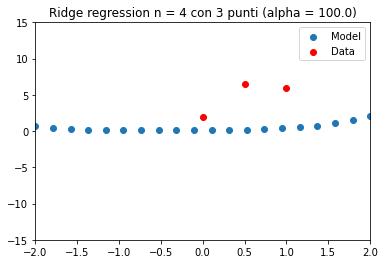

In [182]:
n = 4
alpha = 1.

# SCRIVERE QUI SOTTO IL CODICE DELL'ESERCIZIO
################
# 1. Rifare l'esempio aggiungendo un data point. Confrontare la soluzione per lo stesso valore di 𝛼=1

# Aggiungiamo un punto a x

x3 = np.array([x2[0, 0], x2[1, 0], 0.5])[:, np.newaxis]
y3 = np.array([y2[0, 0], y2[1, 0], 6.5])[:, np.newaxis]


# Creiamo la matrice dei dati X3
X3 = np.concatenate((x3**4, x3**3, x3**2, x3**1, x3**0),1)

# Applichiamo la formula della ridge regression
theta3 = np.linalg.inv(X3.T @ X3 + 1. * np.eye(5)) @ X3.T @ y3

# Valutiamo il nuovo modello in alcuni punti
x3_new = np.linspace(-2, 2, 20)[:, np.newaxis]
X3_new = np.concatenate((x3_new**4, x3_new**3, x3_new**2, x3_new**1, x3_new**0),1)
y3_new = X3_new@theta3  

# Plottiamo il nuovo modello (e confrontiamo con il modello fittato con 2 punti)
plt.scatter(x2_new, y2_new)
plt.scatter(x2, y2, color='r')
plt.legend(['Model', 'Data'])
plt.xlim(-2, 2)
plt.ylim(-15, 15)
plt.title('Ridge regression n = 4 con 2 punti (alpha = 1)')

plt.figure()
plt.scatter(x3_new, y3_new)
plt.scatter(x3, y3, color='r')
plt.legend(['Model', 'Data'])
plt.xlim(-2, 2)
plt.ylim(-15, 15)
plt.title('Ridge regression n = 4 con 3 punti (alpha = 1)')

for alpha_i in [0.1, 0.5, 10., 100.]:
  theta = np.linalg.inv(X3.T @ X3 + alpha_i * np.eye(5)) @ X3.T @ y3
  y_new = X3_new@theta
  
  plt.figure()
  plt.scatter(x3_new, y_new)
  plt.scatter(x3, y3, color='r')
  plt.legend(['Model', 'Data'])
  plt.xlim(-2, 2)
  plt.ylim(-15, 15)
  plt.title(f"Ridge regression n = 4 con 3 punti (alpha = {alpha_i})")


## Regolarizzazione per problemi 1D


Passiamo ad esaminare segnali uni-dimensionali. A tal fine carichiamo la traccia di batteria che abbiamo gia incontrato nella prima lezione e selezioniamo un chunk di 2 secondi.

In [ ]:
sr = 44100
# carichiamo il sample della traccia compreso tra 0:10 e 0:12
t1 = 10
t2 = 12
drums, _ = librosa.load('drums.wav', sr=sr)
drums = drums[t1 * sr: t2 * sr]

Visualizziamo una sezione del segnale:

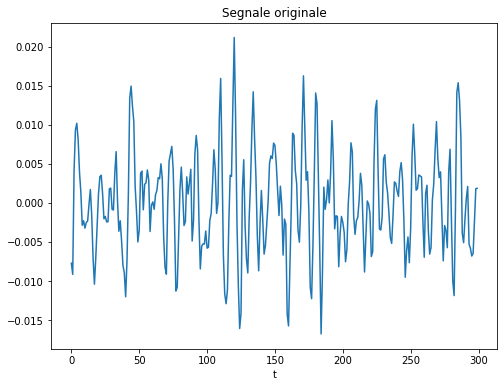

In [ ]:
y_plot = drums[200:500]
x_plot = np.arange(y_plot.shape[0])
plot(x_plot, y_plot, title="Segnale originale")

IPython.display.Audio(drums, rate=sr)

Possiamo sfocare la traccia applicando un kernel Gaussiano locale $K \in \mathbb{R}^{n\times n}$, tale che $K_{i, j} = g_{a,c}(j - i)$, dove $$g_{a,c}(j - i) = a \exp{-\frac{(j - i)^2}{2c^2}}.$$

Per ottenere una rappresentazione sparsa di $K$, scegliamo solo 100 entrate su ogni riga diverse da 0: la funzione Gaussiana decresce esponenzialmente quindi non c'e' bisogno di memorizzare tutte le entrate nella matrice $K$ (la quale è molto grande, dato che $n$ = 88200 nel nostro caso).

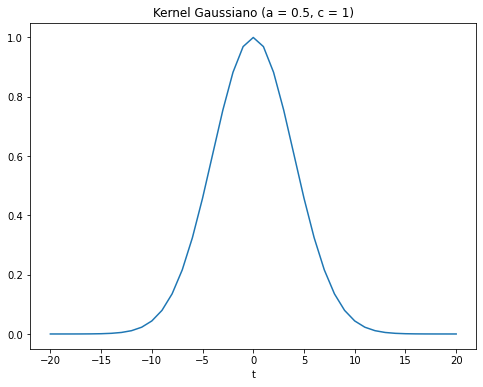

In [ ]:
entries = 41
kernel_interval = np.arange(entries, dtype=np.int64) - (entries//2)

a = 1.
c = 4.
G = a*np.exp(-kernel_interval**2/(2*c**2))

y_plot = G
x_plot = kernel_interval
plot(x_plot, y_plot, title="Kernel Gaussiano (a = 0.5, c = 1)")

G = G[np.newaxis, :]

In [ ]:
def multi_roll(x):
  X = np.zeros((entries, x.shape[0]))
  for i, j in enumerate(range(entries//2, -entries//2, -1)):
    X[i, :] = np.roll(x, shift=j)
  return X

Possiamo sfocare il segnale semplicemente applicando la matrice $G$:

In [ ]:
drums_blur = G @ multi_roll(drums)

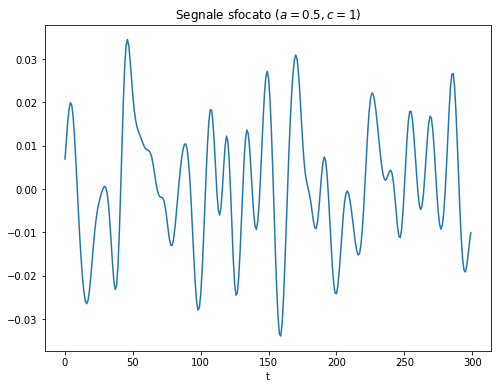

In [ ]:
y_plot = drums_blur[0, 200:500]
x_plot = np.arange(y_plot.shape[0])
plot(x_plot, y_plot, title="Segnale sfocato ($a=0.5, c=1$)")

IPython.display.Audio(drums_blur, rate=sr)

Osserviamo che il segnale è diventato più *smooth*. Vediamo cosa succede se aumentiamo il parametro $c$:

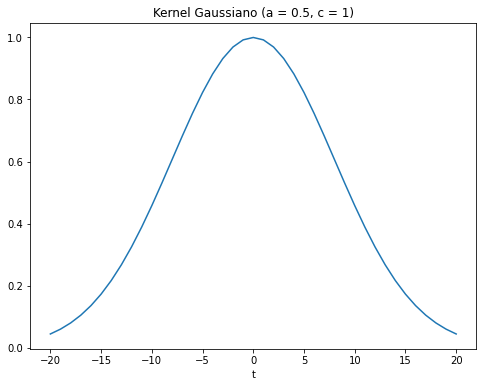

In [ ]:
a = 1.
c = 8.                                                            
G = a*np.exp(-kernel_interval**2/(2*c**2))                
                                                                   
y_plot = G                                                
x_plot = kernel_interval                                           
plot(x_plot, y_plot, title="Kernel Gaussiano (a = 0.5, c = 1)")    

G = G[np.newaxis, :]

In [ ]:
drums_blur = G@multi_roll(drums)

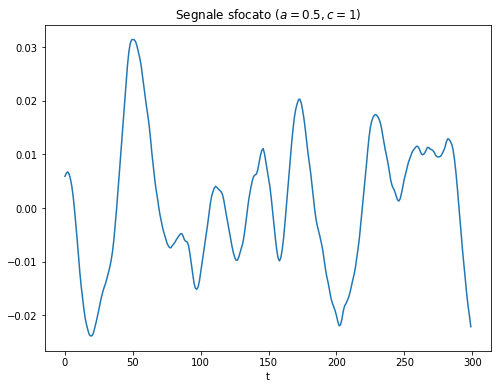

In [ ]:
y_plot = drums_blur[0, 200:500]
x_plot = np.arange(y_plot.shape[0])
plot(x_plot, y_plot, title="Segnale sfocato ($a=0.5, c=1$)")

IPython.display.Audio(drums_blur, rate=sr)

Ci poniamo il seguente problema inverso: conoscendo la traccia sfocata $x_{\text{blurry}}$ e l'operatore di blurring $G$, possiamo risalire alla traccia originale $x$? Il problema è sotto-determinato essendoci infinite $x$ tali che $G x = x_{\text{blurry}}$. A tal fine risolviamo il problema usando un regolarizzatore di Tikhonov, provando diversi valori di $\alpha$

In [ ]:
x_blurry = drums_blur

alpha = 0.1

x_1 = np.linalg.inv(G.T@G + alpha*np.eye(G.shape[1]))@G.T@x_blurry
x_1 = x_1[entries//2,:]

In [ ]:
(np.linalg.inv(G.T@G + alpha*np.eye(G.shape[1]))@G.T).shape

(41, 1)

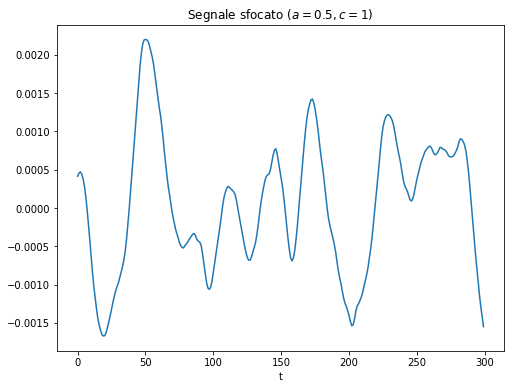

In [ ]:
y_plot = x_1[200:500]
x_plot = np.arange(y_plot.shape[0])
plot(x_plot, y_plot, title="Segnale sfocato ($a=0.5, c=1$)")

IPython.display.Audio(x_1, rate=sr)

In [ ]:
X.shape

(80, 88200)